In [1]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Cluster/Eb/"
from matplotlib import colormaps
cm = colormaps['viridis']
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
from scipy.ndimage import uniform_filter1d

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def sliding_average(X, Y, window_size=5):

    half_window = window_size // 2
    
    # Initialize smoothed Y array
    Y_smooth = np.convolve(Y, np.ones(window_size)/window_size, mode='valid')
    
    # Adjust X to match the size of the smoothed Y array
    # This centers the window on the point being averaged
    start_index = (window_size - 1) // 2
    end_index = start_index + len(Y_smooth)
    X_smooth = X[start_index:end_index]
    
    return X_smooth, Y_smooth

In [2]:
Colors = [(204/255,35/255,129/255),(84/255,125/255,61/255),(86/255,42/255,132/255),(0,126/255,148/255),(231/255,81/255,19/255),(0,0,0)]
print(Colors)

[(0.8, 0.13725490196078433, 0.5058823529411764), (0.32941176470588235, 0.49019607843137253, 0.23921568627450981), (0.33725490196078434, 0.16470588235294117, 0.5176470588235295), (0, 0.49411764705882355, 0.5803921568627451), (0.9058823529411765, 0.3176470588235294, 0.07450980392156863), (0, 0, 0)]


In [3]:
mus = [10**-1,5*10**-2,10**-2,5*10**-3,10**-3,5*10**-4]
Eb = np.array([-1,-2,-3,-4,-4.33,-4.66,-5,-5.5,-6,-7,-8,-9])
print(Eb.shape)
for mu in mus:
    print(-Eb*np.log(mu)/np.log(10))

(12,)
[-1.   -2.   -3.   -4.   -4.33 -4.66 -5.   -5.5  -6.   -7.   -8.   -9.  ]
[ -1.30103     -2.60205999  -3.90308999  -5.20411998  -5.63345988
  -6.06279978  -6.50514998  -7.15566498  -7.80617997  -9.10720997
 -10.40823997 -11.70926996]
[ -2.    -4.    -6.    -8.    -8.66  -9.32 -10.   -11.   -12.   -14.
 -16.   -18.  ]
[ -2.30103     -4.60205999  -6.90308999  -9.20411998  -9.96345988
 -10.72279978 -11.50514998 -12.65566498 -13.80617997 -16.10720997
 -18.40823997 -20.70926996]
[ -3.    -6.    -9.   -12.   -12.99 -13.98 -15.   -16.5  -18.   -21.
 -24.   -27.  ]
[ -3.30103     -6.60205999  -9.90308999 -13.20411998 -14.29345988
 -15.38279978 -16.50514998 -18.15566498 -19.80617997 -23.10720997
 -26.40823997 -29.70926996]


names = [ 'E-15_N100_ell2E5_kdiffE-3.hdf',
                'E-15_N100_ellE5_kdiffE-3.hdf',
                'E-15_N100_ell2E4_kdiffE-3.hdf',
                'E-15_N100_ellE4_kdiffE-3.hdf',
                'E-15_N100_ell2E3_kdiffE-3.hdf',
                'E-15_N100_ellE3_kdiffE-3.hdf',
                'E-15_N100_ellE3_kdiffE-3.hdf']
NRGs = list()
Ell = list()
for name in names:
    nrg = Data_Treatement(media+name,data_type='NRG')
    nrg.average(num_bins=100,log_scale=True)    
    Ell.append(nrg.attributes['ell_tot'])
    print(nrg.attributes)
    NRGs.append([nrg.binned_time,nrg.average_data/nrg.attributes['Energy']/nrg.attributes['Nlinker']])
for nrg,ell in zip(NRGs,Ell):
    plt.scatter(nrg[0],nrg[1],label=ell)
    #for n in range(nrg.data.shape[0]):    
    #    plt.plot(nrg.time[n],nrg.data[n]/nrg.attributes['Energy'])
plt.xscale('log')
plt.legend()

In [4]:
names = [ 'E1_N100_ell2E5_kdiffE-3.hdf',
        'E1_N100_ellE5_kdiffE-3.hdf',
        'E1_N100_ell2E4_kdiffE-3.hdf',
        'E1_N100_ellE4_kdiffE-3.hdf',
        'E1_N100_ell2E3_kdiffE-3.hdf',
        'E1_N100_ellE3_kdiffE-3.hdf']

In [5]:
NRGs = list()
LsN = list()
for name in names:
    #NRGs.append( Data_Treatement(media+"not_too_bad/"+name,data_type='NRG'))
    NRGs.append( Data_Treatement(media+name,data_type='NRG'))
    LsN.append(NRGs[-1].attributes['ell_tot']/NRGs[-1].attributes['Nlinker'])

    print(NRGs[-1].attributes)

{'ell_tot': 200000, 'Energy': -3.301029995663981, 'kdiff': 0.001, 'seed': 119255, 'Nlinker': 100, 'dimension': 3, 'step_tot': 1000000, 'check_steps': 1000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (36.51483716701107,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.036406780553851784, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (200000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': False, 'MSD': False, 'ISF': False, 'PCF': False, 'PCF_L': False}, 'ISF_arg': None}
{'ell_tot': 100000, 'Energy': -2.9999999999999996, 'kdiff': 0.001, 'seed': 232225, 'Nlinker': 100, 'dimension': 3, 'step_tot': 1000000, 'check_steps': 1000, 'coarse_grained_step': 100, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (25.81988897471611,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.051490260092525754, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 

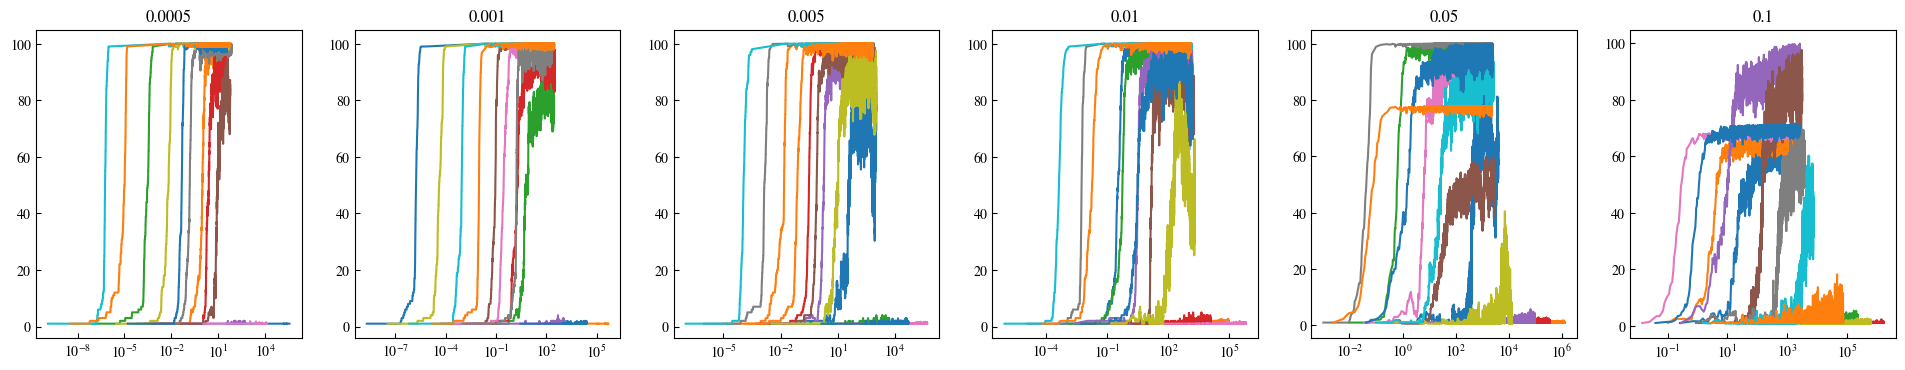

In [6]:
fig,ax = plt.subplots(ncols=NRGs.__len__(),figsize=(4*NRGs.__len__(),4))
Ebs,Bounds = list(),list()
for i,nrg in enumerate(NRGs):
    j=0
    Eb,Bound= list(),list()
    for x,y in zip(nrg.time,nrg.data):
        if y[0]!=0:
            ax[i].plot(x,y/y[0],label=y[0])
        else:
            ax[i].plot(x,y,label=0)
        j+=1
        Eb.append(y[0])
        Bound.append(np.mean(y[-100:])/y[0])
    Ebs.append(Eb)
    Bounds.append(Bound)
    #ax[i].legend()
    ax[i].set_title(nrg.attributes['Nlinker']/nrg.attributes['ell_tot'])
    ax[i].set_xscale('log')
Ebs = np.array(Ebs)
Bounds = np.array(Bounds)
for i in range(Ebs.__len__()):
    Bounds[i] = Bounds[i][np.argsort(Ebs[i])]
    Ebs[i] = Ebs[i][np.argsort(Ebs[i])]


In [7]:
Bounds[5][:2] = 99.9

In [8]:
# Discard the 8,9 files because the initial energy seems off. idk why
names_time = ['E1_N100_ell2E4_kdiffE-3_'+str(i)+'.hdf' for i in range(1,8)]
NRGs_t = list()
LsN_t = list()
for name in names_time:
    #NRGs.append( Data_Treatement(media+"not_too_bad/"+name,data_type='NRG'))
    NRGs_t.append( Data_Treatement(media+name,data_type='NRG'))
    LsN_t.append(NRGs_t[-1].attributes['ell_tot']/NRGs_t[-1].attributes['Nlinker'])
    energies = [data[0] for data in NRGs_t[-1].data]
    #print(name)
    #print(np.sort(energies))
    print(NRGs_t[-1].attributes)


{'ell_tot': 20000, 'Energy': -2.301029995663981, 'kdiff': 0.001, 'seed': 151265, 'Nlinker': 100, 'dimension': 3, 'step_tot': 500000, 'check_steps': 1000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (11.547005383792516,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.11524722434678406, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (20000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'Cluster': False, 'MSD': False, 'ISF': False, 'PCF': False, 'PCF_L': False}, 'ISF_arg': None}
{'ell_tot': 20000, 'Energy': -2.301029995663981, 'kdiff': 0.001, 'seed': 501856, 'Nlinker': 100, 'dimension': 3, 'step_tot': 500000, 'check_steps': 1000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'Cluster': (<class 'Cluster.Cluster'>, (11.547005383792516,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.11524722434678406, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L':

In [9]:
NRG_sorted = dict()
time_sorted = dict()
for nrg in NRGs_t:
    for data in nrg.data:
        NRG_sorted[f"{data[0]:.3f}"] = list()
        time_sorted[f"{data[0]:.3f}"] = list()

In [10]:
for nrg in NRGs_t:
    for time,data in zip(nrg.time,nrg.data):
        NRG_sorted[f"{data[0]:.3f}"].append(data)
        time_sorted[f"{data[0]:.3f}"].append(time)
for key,values in NRG_sorted.items():
    NRG_sorted[key]  = np.array(NRG_sorted[key])
    time_sorted[key]  = np.array(time_sorted[key])

In [25]:
Nlinker = 100
ell_tot = 2*10**4
mu = Nlinker/ell_tot
Eb = np.array([-1,-2,-3,-4,-4.33,-4.66,-5,-5.5,-6,-7,-8,-9])
Eb = -Eb*np.log(mu)/np.log(10)
keys = list()
for e in Eb:
    keys.append((f"{e:.3f}"))
print(keys)

['-2.301', '-4.602', '-6.903', '-9.204', '-9.963', '-10.723', '-11.505', '-12.656', '-13.806', '-16.107', '-18.408', '-20.709']


In [26]:
np.sort(list(float(key) for key in NRG_sorted.keys()))[0]

-20.709

In [27]:
time_sorted[key]

array([[7.495478804752135e-08, 1.9209211441742182e-07,
        2.7304761255683284e-07, ..., 888.5991655800649, 888.599173981427,
        888.5991835151318],
       [1.2648854309169605e-07, 2.2254461966591997e-07,
        2.7676470599562854e-07, ..., 718.3745885026598,
        718.3746022305045, 718.3746128584955],
       [3.010546977519445e-08, 1.1375089545132094e-07,
        1.969950519676875e-07, ..., 801.5736865777507, 801.5737001787559,
        801.5737106951034],
       ...,
       [1.4992023807334694e-07, 2.2408168877029186e-07,
        3.18134544274914e-07, ..., 692.2749735353423, 692.3262223807908,
        692.334033027782],
       [1.1549308853277995e-07, 2.159764426151443e-07,
        3.3495757754354276e-07, ..., 693.0611334280452,
        693.0611472033703, 693.0611589360998],
       [5.532689236611195e-08, 1.740203945303207e-07,
        2.7924540931030526e-07, ..., 779.5576945438579,
        779.5577081443357, 779.5577179375432]], dtype=object)

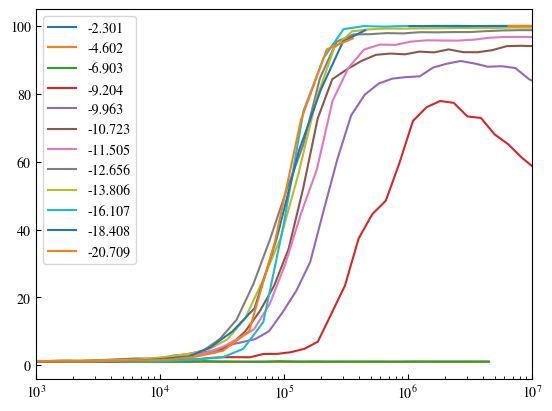

In [35]:
key = keys[-1]
for key in keys:
    X,Y = average_scalar(time_sorted[key],NRG_sorted[key]/float(key),num_bins=50,log_scale=True)
    plt.plot(X/np.exp(float(key)),Y,label=key)
    #for time,nrg in zip(time_sorted[key],NRG_sorted[key]):
    #    x,y = time,nrg
    #    plt.plot(x,y/y[0], label = f"{y[0]:.1f}")
plt.xscale('log')
plt.xlim(10**3,10**7)
plt.legend()

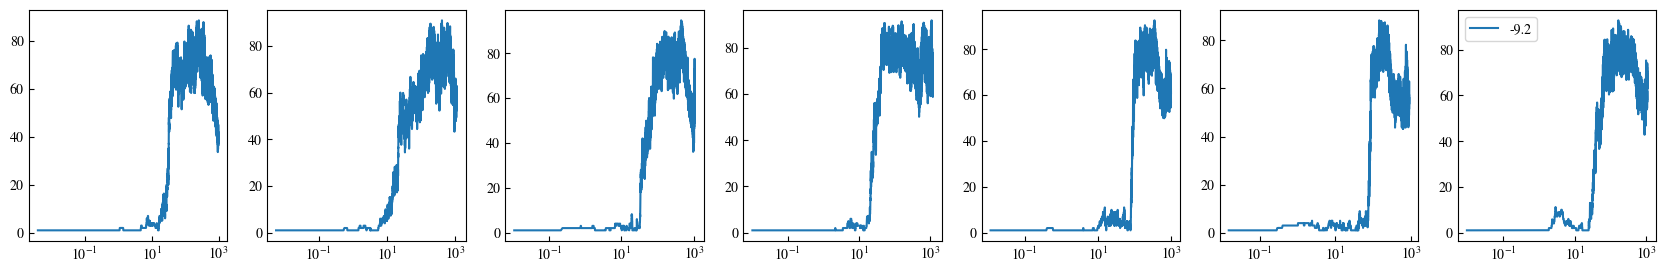

In [43]:
key = keys[3]
fig,ax = plt.subplots(ncols=time_sorted[key].__len__(),figsize=(3*time_sorted[key].__len__(),3))
i=0
for time,nrg in zip(time_sorted[key],NRG_sorted[key]):
    x,y = time,nrg
    ax[i].plot(x,y/y[0], label = f"{y[0]:.1f}")
    ax[i].set_xscale('log')
    i+=1
    
plt.legend()

/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation/Data_Treatement.py:284: RuntimeWarning: invalid value encountered in divide
  weighted_average /=count


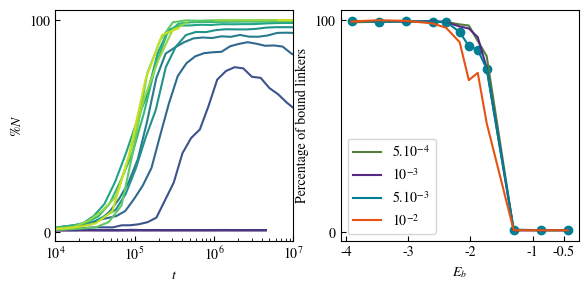

In [45]:
cm = colormaps['viridis']
#for eb,bound in zip(Ebs[2:],Bounds[2:]):
#fig,ax = plt.subplots(figsize=(3.5,3.))
fig,axes = plt.subplots(ncols = 2, figsize=(3.375*2,3.))
ax = axes[1]
Colors = [(204/255,35/255,129/255),(84/255,125/255,61/255),(86/255,42/255,132/255),(0,126/255,148/255),(231/255,81/255,19/255),(0,0,0)]
mus = [r'$5.10^{-4}$',r'$10^{-3}$',r'$5.10^{-3}$',r'$10^{-2}$']
for i in range(Ebs.__len__()-2):
    ax.plot(Ebs[i]/np.log(LsN[i]),Bounds[i],color=Colors[i+1],label=mus[i])
    if i==2:
        ax.scatter(Ebs[i]/np.log(LsN[i]),Bounds[i],color=Colors[i+1])
    #plt.plot(Ebs[i],Bounds[i],color=Colors[i],label=LsN[i])
ax.legend()
ax.set_xlabel(r'$E_b$')
ax.set_ylabel('Percentage of bound linkers')
ax.set_xticks([-0.5,-1,-2,-3,-4],['-0.5','-1','-2','-3','-4'])
ax.set_yticks([0,100])

#inset_ax = inset_axes(ax, width="45%", height="45%", bbox_to_anchor=(-0.15,-0.15,1.,1.),bbox_transform = ax.transAxes,loc='center')  # 30% of parent dimensions
inset_ax = axes[0]

n=0

for key in keys:
    X,Y = average_scalar(time_sorted[key],NRG_sorted[key]/float(key),num_bins=50,log_scale=True)
    inset_ax.plot(X/np.exp(float(key)),Y,color=cm(n/keys.__len__()))
    n+=1

#for x,y in zip(NRGs[2].time,NRGs[2].data):
#    Imax = -1
#    k_ub = np.exp(-y[0])
#    y = np.array(y,dtype=float)
#    #x,y = sliding_average(x,y,2)
#    #y = uniform_filter1d(y, size=20, mode='nearest')
#    inset_ax.plot(k_ub*x[:Imax],y[:Imax]/y[0],color=cm(n/NRGs[1].data.__len__()))
#    n+=1
inset_ax.set_xscale('log')
#inset_ax.set_xticks([10**-8,10**2])
inset_ax.set_xlim(10**4,10**7)
inset_ax.set_yticks([0,100])
inset_ax.set_ylabel(r'$\% N$')
inset_ax.set_xlabel(r'$t$')

plt.savefig('Nlinker.svg',transparent=True,bbox_inches='tight')